# Machine Learning Master Notes 7 - Gradient Descent on Linear Regression

## Linear Regression (One Feature) and Gradient Descent

### Prepare Environment

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

### Linear Regression and Cost Function Summary


In summary, for one feature linear regression:

Hypothesis: $$f_{w,b}(x^{(i)})=wx^{(i)}+b$$

Parameters:	$$w ,b$$

Cost Function:	$$J(w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})^{2}$$ 


similarly $$J(w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} ((wx^{(i)} + b)-y^{(i)})^{2}$$

Goal: minimize $J(w, b)$


## Concept of Gradient Descent

As shown in the previous notes, it is extremely tedious to compute the learning parameters. Hence, we can adopt the method of gradient descent to find the optimal. Gradient Descent is a computational method to find the lowest cost. 

In a linear regression, we know that `w` is the slope or gradient. We use partial derivatives of `b` and partial derivatives of `w` with respect to the function to let us know which direction to move.

Then we mathematically reduce/increase the `w` at a small step using the formula $w = w - \text{(Partial Derivative of w)}\$. Using this formula, we effectively reduce the `w` and `b` or increase both parameters if they are on the other side of U shape curve. (see diagram below)

In addition, we add $\alpha$, also known as the **learning rate**, in the equation such that we can control how big we want the step size to be.

Thus gradient descent is as follows:
$$w = w - \alpha \text{PartialDerivatives}\$$

Using the formula above, we gradually reduce or increase `w` and `b` until it reach the optimal.

The formula for gradient descent will be as follows:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

At each step, the partial derivatives will be positive if it is at the right hand side of the U shape curve as shown in the diagram below. The formula $w = w - \text{derivatives}$ will gradually reduce w hence moving w to the left.

If the partial derivatives is negative which is on the left hand side of the curve. The formula $w = w - \text{derivatives}$ will add to w causing w to increase and move to the right.

Please note that the partial derivatives will get smaller as it reaches nearer to the center where the cost is zero.

Finally, we also describe the whole process of running gradient descent to find the best learning parameters as **machine learning training** or **training** in short.

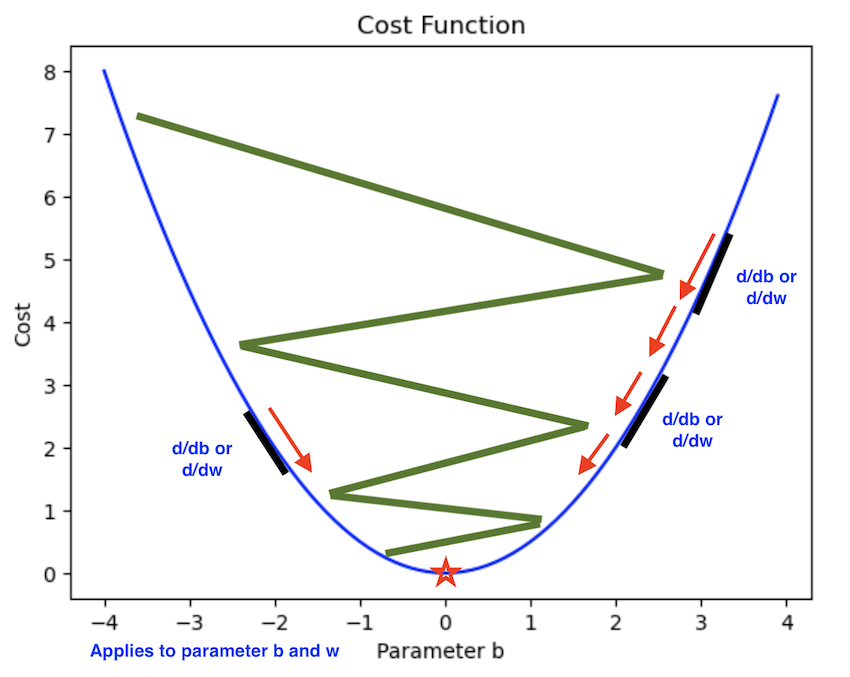

### What is the Purpose of Learning Rate ($\alpha$)

In the gradient descent below, there is an additional component known as $\alpha$, a.k.a **learning rate**:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

This component $\alpha$ is used to control how big each step size is. For example, assuming  derivatives $= 0.8$ and $w = 5$, 
$$$$
If $\alpha = 1$, then:
$$w = w - \alpha (derivatives)$$
$$w = 5 - 1 * 0.8$$
$$w = 4.2$$

If $\alpha = 0.1$, then:
$$w = 5 - 0.1 * 0.8$$
$$w = 5 - 0.08$$
$$w = 4.92$$

As you can see, $\alpha$ makes `w` increase\decrease faster. The smaller the $\alpha$, the smaller the step size.

<div class="alert alert-block alert-info"><b> In practice, $\alpha$ is set at 0.01. Alpha is one of the hyper-parameter that we need to tune depending on the type of data we have. Please also note that if the learning rate is too large, the `w` or `b` will not descent and increase rapidly instead, as shown in the green line on the drawing above.</b></div>

## Gradient Descent Formulation

Hypothesis: $$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$
Cost Function: $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives: $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

Full Implementation of Gradient Descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((wx^{(i)} + b) - y^{(i)})x^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((wx^{(i)} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

### Gradient Descent Algorithm

The gradient descent algorithm is based on the formula below:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((wx^{(i)} + b) - y^{(i)})x^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((wx^{(i)} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

Repeat until convergence means that we repeat the process until the cost is very low. There are two technique in designing an algorithm that converge. 

**Iterations**
The most common technique is to use iterations. However, iterations would not let us known if it has converge. Too low in numbers of iterations, it will not converge; too high in numbers of iterations, we are wasting CPU cycle. Usually, we use a chart of learning curve to check the progress. Learning curve is the chart that shows the relationship between the cost and the iterations. We can adjust the number of iterations while running gradient descent.

**Tolerance**
The other technique is to use tolerance limit to check the different between the previous learning parameters (`b` and `w`) and the current learning parameters. We will run an endless loop and check if the difference between the previous learning parameters and the current learning parameters is less than a limit such as 0.0001. If so we can stop the loop. How fast the algorithm runs also depends on how small our tolerance limits are. We will adjust the tolerance limit on a case by case basis. 


Thus in this algorithm, we have an additional tuning either on number of iterations or tolerance limits.


<div class="alert alert-block alert-info"><b> Important:</b>

In the formula below, there are elements of `w` and `b`.
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((wx^{(i)} + b) - y^{(i)})x^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((wx^{(i)} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

The formula suggest that when we update the first `w`, we **SHOULD NOT** use the updated `w` in the next formula for `b`.

It is suggest that we use techniques similar to the below

Computing gradient for each cycle:

        temp_w = w - alpha * partial derivatives of w 

        temp_b = b - alpha * partial derivatives of b


Once the computation for each cycle is complete, then we update `w` and `b`

        w = temp_w
        b = temp_b

</div>

## Computation of Gradient Descent (Using Number of Iterations)

In [2]:
def cost_function_l(x,y,b,w):
    m = len(x)
    sumRow = 0.
    for i in range(m):
        fx = ((w * x[i]) + b)
        costEachEx = (fx - y[i]) ** 2
        sumRow += costEachEx

    return (1 / (2 * m)) * sumRow

In [3]:
def compute_gradient_l(x,y,b,w):
    
    # Total number of data points
    m = len(x)

    # Initialization of Variables 
    db = 0
    dw = 0
    temp_db = 0
    temp_dw = 0

    # Loop to compute all data set
    for i in range(m):
        fx = ((w * x[i]) + b) 
        temp_dw = (fx - y[i]) * x[i]
        temp_db = (fx - y[i])
        db += temp_db
        dw += temp_dw
    
    db = db/m 
    dw = dw/m 

    return db, dw

In [4]:
def compute_gradient_descent_l(x, y, iterations=10000, init_b=0., init_w=0., alpha=0.01, printProgress=False, printProgressRate = 1000):

    # Initialization of variables
    db = 0
    dw = 0

    b = init_b
    w = init_w
    
    cost_history = []
    w_history = []
    b_history = []

    
    for j in range(iterations):

        # Compute Partial Derivatives
        db, dw = compute_gradient_l(x,y,b,w) 

        b = b - (alpha * db)
        w = w - (alpha * dw)
        
        cost = cost_function_l(x,y,b,w)
        
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)

        if printProgress == True:
            if j % printProgressRate == 0:
                print(f"iteration {j}: db = {db:.4e}: b = {b:.4e}: dw = {dw:.4e}: w = {w:.4e}: cost = {cost:.4e}")
    
    print('best w', round(w, 4))
    print('best b', round(b, 4)) 

    return w, b, cost_history, w_history, b_history

### Testing Gradient Descent : Test Case 1

In [5]:
x = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)

In [6]:
w, b, cost_history, w_history, b_history = compute_gradient_descent_l(x,y, printProgress=True)

iteration 0: db = -2.0000e+00: b = 2.0000e-02: dw = -4.6667e+00: w = 4.6667e-02: cost = 2.0827e+00
iteration 1000: db = 1.3308e-02: b = 1.1058e-01: dw = -5.8540e-03: w = 9.5135e-01: cost = 8.7712e-04
iteration 2000: db = 3.9974e-03: b = 3.3217e-02: dw = -1.7585e-03: w = 9.8539e-01: cost = 7.9144e-05
iteration 3000: db = 1.2008e-03: b = 9.9780e-03: dw = -5.2822e-04: w = 9.9561e-01: cost = 7.1413e-06
iteration 4000: db = 3.6069e-04: b = 2.9972e-03: dw = -1.5867e-04: w = 9.9868e-01: cost = 6.4437e-07
iteration 5000: db = 1.0835e-04: b = 9.0033e-04: dw = -4.7662e-05: w = 9.9960e-01: cost = 5.8142e-08
iteration 6000: db = 3.2546e-05: b = 2.7045e-04: dw = -1.4317e-05: w = 9.9988e-01: cost = 5.2463e-09
iteration 7000: db = 9.7763e-06: b = 8.1238e-05: dw = -4.3006e-06: w = 9.9996e-01: cost = 4.7338e-10
iteration 8000: db = 2.9366e-06: b = 2.4403e-05: dw = -1.2918e-06: w = 9.9999e-01: cost = 4.2713e-11
iteration 9000: db = 8.8213e-07: b = 7.3302e-06: dw = -3.8805e-07: w = 1.0000e+00: cost = 3.8

In [7]:
%%timeit -r 1 -n 1
compute_gradient_descent_l(x,y)
# This is timing function that will check the timing but not capturing return
# Checking timing with 10,000 iterations

best w 1.0
best b 0.0
64.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -r 1 -n 1
compute_gradient_descent_l(x,y,iterations=6000)
# This is timing function that will check the timing but not capturing return
# Checking timing with just 6,000 iterations

best w 0.9999
best b 0.0003
136 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


As we use lower iterations, our training gets faster but accuracy decreases.

<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 1$ and $b = 0$ </li>
    </ul>
    </p>


### Testing Gradient Descent : Test Case 2

In [9]:
x2 = np.array([1.0, 2.0])   #features
y2 = np.array([300.0, 500.0])   #target value
best_w, best_b, cost_history, w_history, b_history = compute_gradient_descent_l(x2,y2,iterations=20000, printProgress=True)

iteration 0: db = -4.0000e+02: b = 4.0000e+00: dw = -6.5000e+02: w = 6.5000e+00: cost = 7.9275e+04
iteration 1000: db = 6.0066e-01: b = 1.0823e+02: dw = -3.7123e-01: w = 1.9491e+02: cost = 3.4125e+00
iteration 2000: db = 2.8953e-01: b = 1.0397e+02: dw = -1.7894e-01: w = 1.9755e+02: cost = 7.9290e-01
iteration 3000: db = 1.3956e-01: b = 1.0191e+02: dw = -8.6255e-02: w = 1.9882e+02: cost = 1.8423e-01
iteration 4000: db = 6.7273e-02: b = 1.0092e+02: dw = -4.1577e-02: w = 1.9943e+02: cost = 4.2805e-02
iteration 5000: db = 3.2427e-02: b = 1.0044e+02: dw = -2.0041e-02: w = 1.9973e+02: cost = 9.9458e-03
iteration 6000: db = 1.5631e-02: b = 1.0021e+02: dw = -9.6604e-03: w = 1.9987e+02: cost = 2.3109e-03
iteration 7000: db = 7.5345e-03: b = 1.0010e+02: dw = -4.6566e-03: w = 1.9994e+02: cost = 5.3694e-04
iteration 8000: db = 3.6318e-03: b = 1.0005e+02: dw = -2.2446e-03: w = 1.9997e+02: cost = 1.2476e-04
iteration 9000: db = 1.7506e-03: b = 1.0002e+02: dw = -1.0820e-03: w = 1.9999e+02: cost = 2.8

<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 200$ and $b = 100$ </li>
    </ul>
    </p>

### Testing Gradient Descent : Test Case 3

In [10]:
x3 = np.array([1,2,3])
y3 = np.array([3,4,5])
best_w, best_b, cost_history, w_history, b_history = compute_gradient_descent_l(x3,y3)

best w 1.0
best b 2.0


<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 1$ and $b = 2$ </li>
    </ul>
    </p>

## Detail Examinations of Gradient Descent

In [11]:
x = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)

In [12]:
w, b, cost_history,  w_history, b_history = compute_gradient_descent_l(x,y, printProgress=True)

iteration 0: db = -2.0000e+00: b = 2.0000e-02: dw = -4.6667e+00: w = 4.6667e-02: cost = 2.0827e+00
iteration 1000: db = 1.3308e-02: b = 1.1058e-01: dw = -5.8540e-03: w = 9.5135e-01: cost = 8.7712e-04
iteration 2000: db = 3.9974e-03: b = 3.3217e-02: dw = -1.7585e-03: w = 9.8539e-01: cost = 7.9144e-05
iteration 3000: db = 1.2008e-03: b = 9.9780e-03: dw = -5.2822e-04: w = 9.9561e-01: cost = 7.1413e-06
iteration 4000: db = 3.6069e-04: b = 2.9972e-03: dw = -1.5867e-04: w = 9.9868e-01: cost = 6.4437e-07
iteration 5000: db = 1.0835e-04: b = 9.0033e-04: dw = -4.7662e-05: w = 9.9960e-01: cost = 5.8142e-08
iteration 6000: db = 3.2546e-05: b = 2.7045e-04: dw = -1.4317e-05: w = 9.9988e-01: cost = 5.2463e-09
iteration 7000: db = 9.7763e-06: b = 8.1238e-05: dw = -4.3006e-06: w = 9.9996e-01: cost = 4.7338e-10
iteration 8000: db = 2.9366e-06: b = 2.4403e-05: dw = -1.2918e-06: w = 9.9999e-01: cost = 4.2713e-11
iteration 9000: db = 8.8213e-07: b = 7.3302e-06: dw = -3.8805e-07: w = 1.0000e+00: cost = 3.8

### Graph Plot Relationship between cost and w

**We can adjust how must of the history to plot by changing w_history[:] and cost_history[:]**

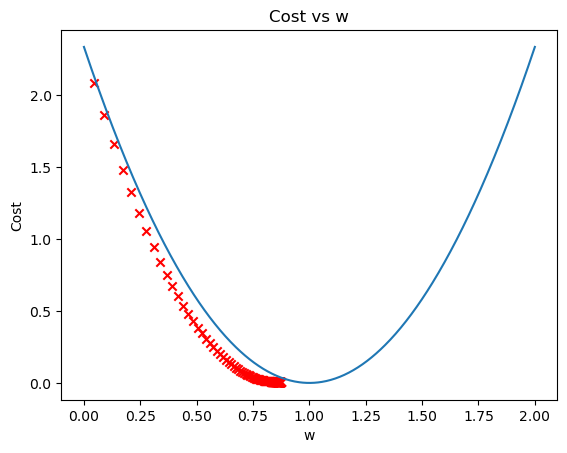

In [13]:
# We can adjust to plot only the first n number of data by changing n in w_history[:n] and cost_history[:n]
# The n will decide to plot only the first n data point

# Use n to plot the first n data point
# For full data use len(w_history)
n = 200
w = np.linspace(0,2.,600)
costw = cost_function_l(x,y,0,w)
plt.close('all') 
fig = plt.figure()
# Plot the data points
plt.plot(w,costw)
# Plot w by cost
plt.scatter(w_history[:n],cost_history[:n], marker='x', color='red')
# Set the title
plt.title("Cost vs w")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('w')
plt.show()

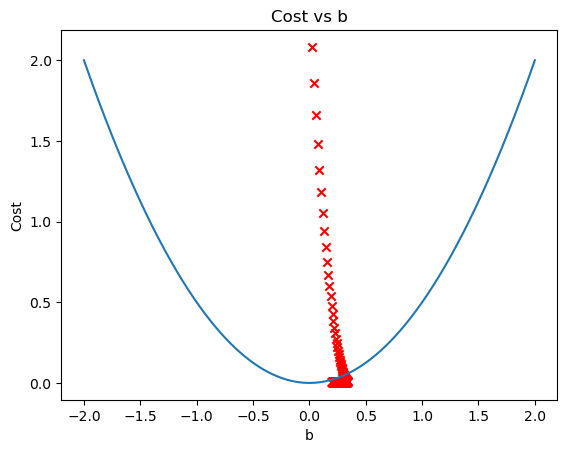

In [14]:
# We can adjust to plot only the first n number of data by changing n in w_history[:n] and cost_history[:n]
# The n will decide to plot only the first n data point

# Use n to plot the first n data point
# For full data use len(b_history)
n = 500

b = np.linspace(-2.,2.,1200)
costb = cost_function_l(x,y,b,1)
plt.close('all') 
fig = plt.figure()
# Plot the data points
plt.plot(b,costb)
# Plot w by cost
plt.scatter(b_history[:n], cost_history[:n], marker='x', color='red')
# Set the title
plt.title("Cost vs b")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('b')
plt.show()

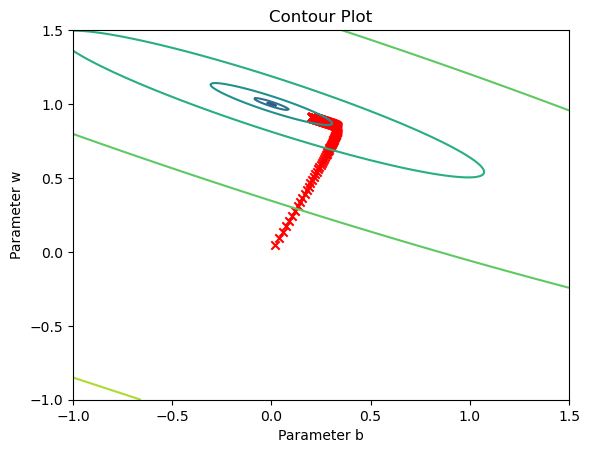

In [15]:
# We can adjust to plot only the first n number of data by changing n in w_history[:n] and cost_history[:n]
# The n will decide to plot only the first n data point

# Use n to plot the first n data point
# For full data use len(b_history)
n = 500


x = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)
b_space  = np.linspace(-1,1.5, 300)
w_space  = np.linspace(-1,1.5, 300)

plt.close('all') 
fig1 = plt.figure()
ax1 = fig1.add_subplot()

# Data
tmp_b,tmp_w = np.meshgrid(b_space,w_space)
cost =  cost_function_l(x,y,tmp_b,tmp_w)

# Plot the 3d surface
ax1.contour(tmp_b, tmp_w, np.log(cost), levels=6)
ax1.scatter(b_history[:n], w_history[:n], marker='x', c='r')
ax1.set_title("Contour Plot")
ax1.set_xlabel("Parameter b")
ax1.set_ylabel("Parameter w");
plt.show()

**From the chart, we can determine that if the learning parameters is reducing for increasing.**

### Graph Plot Comparing Cost with Iteration

In [16]:
x = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)
w, b, cost_history, w_history, b_history = compute_gradient_descent_l(x,y, printProgress=True)

iteration 0: db = -2.0000e+00: b = 2.0000e-02: dw = -4.6667e+00: w = 4.6667e-02: cost = 2.0827e+00
iteration 1000: db = 1.3308e-02: b = 1.1058e-01: dw = -5.8540e-03: w = 9.5135e-01: cost = 8.7712e-04
iteration 2000: db = 3.9974e-03: b = 3.3217e-02: dw = -1.7585e-03: w = 9.8539e-01: cost = 7.9144e-05
iteration 3000: db = 1.2008e-03: b = 9.9780e-03: dw = -5.2822e-04: w = 9.9561e-01: cost = 7.1413e-06
iteration 4000: db = 3.6069e-04: b = 2.9972e-03: dw = -1.5867e-04: w = 9.9868e-01: cost = 6.4437e-07
iteration 5000: db = 1.0835e-04: b = 9.0033e-04: dw = -4.7662e-05: w = 9.9960e-01: cost = 5.8142e-08
iteration 6000: db = 3.2546e-05: b = 2.7045e-04: dw = -1.4317e-05: w = 9.9988e-01: cost = 5.2463e-09
iteration 7000: db = 9.7763e-06: b = 8.1238e-05: dw = -4.3006e-06: w = 9.9996e-01: cost = 4.7338e-10
iteration 8000: db = 2.9366e-06: b = 2.4403e-05: dw = -1.2918e-06: w = 9.9999e-01: cost = 4.2713e-11
iteration 9000: db = 8.8213e-07: b = 7.3302e-06: dw = -3.8805e-07: w = 1.0000e+00: cost = 3.8

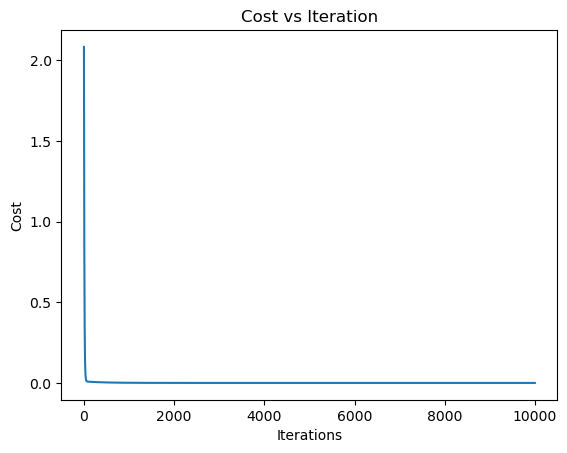

In [17]:
plt.close('all') 
fig = plt.figure()
# Plot the data points
plt.plot(cost_history)
# Set the title
plt.title("Cost vs Iteration")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('Iterations')
plt.show()

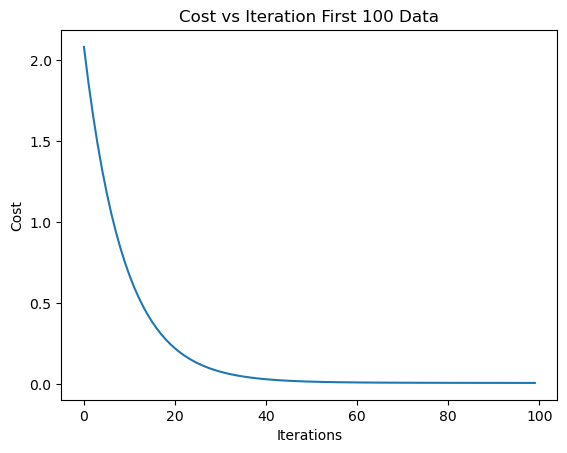

In [18]:
plt.close('all') 
fig = plt.figure()
# Plot the data points
plt.plot(cost_history[:100])
# Set the title
plt.title("Cost vs Iteration First 100 Data")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('Iterations')
plt.show()

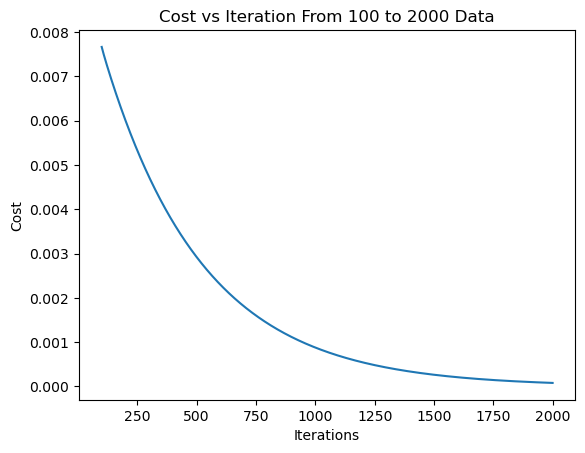

In [19]:
plt.close('all') 
fig = plt.figure()
# Plot the data points
yplot = cost_history[100:2000]
plt.plot( 100 + np.arange(len(yplot)), yplot)
# Set the title
plt.title("Cost vs Iteration From 100 to 2000 Data")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('Iterations')
plt.show()

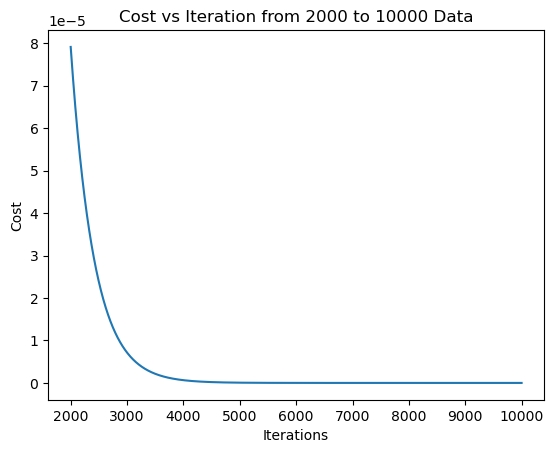

In [20]:
plt.close('all') 
fig = plt.figure()
# Plot the data points
yplot = cost_history[2000:]
plt.plot(2000 + np.arange(len(yplot)), yplot)
# Set the title
plt.title("Cost vs Iteration from 2000 to 10000 Data")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('Iterations')
plt.show()

**From the chart, we can see how fast the cost decreases. We can determine the minimum iterations required for convergence. If on the other hand, the cost does not converge, then we will not if the cost is increase after each iterations.**

### Adjusting Iterations

Base on the chart above, we can adjust iterations to 40 and let us see the result

In [21]:
x = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)

In [22]:
%%timeit -r 1 -n 1
compute_gradient_descent_l(x,y, iterations = 40, printProgress=True, printProgressRate=1)

iteration 0: db = -2.0000e+00: b = 2.0000e-02: dw = -4.6667e+00: w = 4.6667e-02: cost = 2.0827e+00
iteration 1: db = -1.8867e+00: b = 3.8867e-02: dw = -4.4089e+00: w = 9.0756e-02: cost = 1.8591e+00
iteration 2: db = -1.7796e+00: b = 5.6663e-02: dw = -4.1654e+00: w = 1.3241e-01: cost = 1.6596e+00
iteration 3: db = -1.6785e+00: b = 7.3448e-02: dw = -3.9354e+00: w = 1.7176e-01: cost = 1.4816e+00
iteration 4: db = -1.5830e+00: b = 8.9278e-02: dw = -3.7182e+00: w = 2.0895e-01: cost = 1.3229e+00
iteration 5: db = -1.4928e+00: b = 1.0421e-01: dw = -3.5130e+00: w = 2.4408e-01: cost = 1.1812e+00
iteration 6: db = -1.4076e+00: b = 1.1828e-01: dw = -3.3192e+00: w = 2.7727e-01: cost = 1.0548e+00
iteration 7: db = -1.3272e+00: b = 1.3155e-01: dw = -3.1362e+00: w = 3.0863e-01: cost = 9.4206e-01
iteration 8: db = -1.2512e+00: b = 1.4407e-01: dw = -2.9633e+00: w = 3.3826e-01: cost = 8.4147e-01
iteration 9: db = -1.1794e+00: b = 1.5586e-01: dw = -2.8000e+00: w = 3.6626e-01: cost = 7.5172e-01
iteration 

As you can see, cost is 0.033039 but `w` is only 0.76 and `b` is only 0.3137. The expected `w` is 1 and expected `b` is 0. Let us increase the iterations.

In [23]:
%%timeit -r 1 -n 1
compute_gradient_descent_l(x,y, iterations = 400, printProgress=True, printProgressRate=10)

iteration 0: db = -2.0000e+00: b = 2.0000e-02: dw = -4.6667e+00: w = 4.6667e-02: cost = 2.0827e+00
iteration 10: db = -1.1116e+00: b = 1.6698e-01: dw = -2.6457e+00: w = 3.9272e-01: cost = 6.7164e-01
iteration 20: db = -6.0974e-01: b = 2.4818e-01: dw = -1.5034e+00: w = 5.8912e-01: cost = 2.2077e-01
iteration 30: db = -3.2632e-01: b = 2.9224e-01: dw = -8.5775e-01: w = 7.0093e-01: cost = 7.6604e-02
iteration 40: db = -1.6636e-01: b = 3.1532e-01: dw = -4.9272e-01: w = 7.6492e-01: cost = 3.0409e-02
iteration 50: db = -7.6168e-02: b = 3.2657e-01: dw = -2.8633e-01: w = 8.0187e-01: cost = 1.5512e-02
iteration 60: db = -2.5407e-02: b = 3.3116e-01: dw = -1.6959e-01: w = 8.2354e-01: cost = 1.0616e-02
iteration 70: db = 3.0701e-03: b = 3.3200e-01: dw = -1.0351e-01: w = 8.3656e-01: cost = 8.9177e-03
iteration 80: db = 1.8956e-02: b = 3.3074e-01: dw = -6.6078e-02: w = 8.4467e-01: cost = 8.2438e-03
iteration 90: db = 2.7729e-02: b = 3.2832e-01: dw = -4.4831e-02: w = 8.5001e-01: cost = 7.9003e-03
iter

Cost is 0.0038 but w still slight far away from 1 and b is still not 0

In [24]:
%%timeit -r 1 -n 1
compute_gradient_descent_l(x,y, iterations = 4000, printProgress=True, printProgressRate=100)

iteration 0: db = -2.0000e+00: b = 2.0000e-02: dw = -4.6667e+00: w = 4.6667e-02: cost = 2.0827e+00
iteration 100: db = 3.2484e-02: b = 3.2526e-01: dw = -3.2733e-02: w = 8.5378e-01: cost = 7.6655e-03
iteration 200: db = 3.4808e-02: b = 2.8942e-01: dw = -1.5373e-02: w = 8.7267e-01: cost = 6.0086e-03
iteration 300: db = 3.0883e-02: b = 2.5663e-01: dw = -1.3586e-02: w = 8.8711e-01: cost = 4.7240e-03
iteration 400: db = 2.7384e-02: b = 2.2755e-01: dw = -1.2046e-02: w = 8.9990e-01: cost = 3.7140e-03
iteration 500: db = 2.4281e-02: b = 2.0176e-01: dw = -1.0681e-02: w = 9.1124e-01: cost = 2.9200e-03
iteration 600: db = 2.1529e-02: b = 1.7890e-01: dw = -9.4707e-03: w = 9.2130e-01: cost = 2.2957e-03
iteration 700: db = 1.9090e-02: b = 1.5863e-01: dw = -8.3975e-03: w = 9.3022e-01: cost = 1.8049e-03
iteration 800: db = 1.6926e-02: b = 1.4065e-01: dw = -7.4459e-03: w = 9.3813e-01: cost = 1.4190e-03
iteration 900: db = 1.5008e-02: b = 1.2471e-01: dw = -6.6022e-03: w = 9.4514e-01: cost = 1.1156e-03
i

With iterations of 4000, we are close to our expected parameters. Cost is 0.0000008195. Do note that as iteration increases, the time to complete the training also increases.

<div class="alert alert-block alert-info"><b> Although adjust to lower iterations helps to improve speed, it may be at the expense of lower accuracy on the learning parameters.</b>

</div>

### Adjusting Learning Rate - Alpha ($\alpha$)

In [25]:
x = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)

In [26]:
w, b, cost_history,  w_history, b_history = compute_gradient_descent_l(x,y, printProgress=True)

iteration 0: db = -2.0000e+00: b = 2.0000e-02: dw = -4.6667e+00: w = 4.6667e-02: cost = 2.0827e+00
iteration 1000: db = 1.3308e-02: b = 1.1058e-01: dw = -5.8540e-03: w = 9.5135e-01: cost = 8.7712e-04
iteration 2000: db = 3.9974e-03: b = 3.3217e-02: dw = -1.7585e-03: w = 9.8539e-01: cost = 7.9144e-05
iteration 3000: db = 1.2008e-03: b = 9.9780e-03: dw = -5.2822e-04: w = 9.9561e-01: cost = 7.1413e-06
iteration 4000: db = 3.6069e-04: b = 2.9972e-03: dw = -1.5867e-04: w = 9.9868e-01: cost = 6.4437e-07
iteration 5000: db = 1.0835e-04: b = 9.0033e-04: dw = -4.7662e-05: w = 9.9960e-01: cost = 5.8142e-08
iteration 6000: db = 3.2546e-05: b = 2.7045e-04: dw = -1.4317e-05: w = 9.9988e-01: cost = 5.2463e-09
iteration 7000: db = 9.7763e-06: b = 8.1238e-05: dw = -4.3006e-06: w = 9.9996e-01: cost = 4.7338e-10
iteration 8000: db = 2.9366e-06: b = 2.4403e-05: dw = -1.2918e-06: w = 9.9999e-01: cost = 4.2713e-11
iteration 9000: db = 8.8213e-07: b = 7.3302e-06: dw = -3.8805e-07: w = 1.0000e+00: cost = 3.8

Let us try to reduce the iterations to 300 first.

In [27]:
w, b, cost_history,  w_history, b_history= compute_gradient_descent_l(x,y, iterations = 300, printProgress=True, printProgressRate=50)

iteration 0: db = -2.0000e+00: b = 2.0000e-02: dw = -4.6667e+00: w = 4.6667e-02: cost = 2.0827e+00
iteration 50: db = -7.6168e-02: b = 3.2657e-01: dw = -2.8633e-01: w = 8.0187e-01: cost = 1.5512e-02
iteration 100: db = 3.2484e-02: b = 3.2526e-01: dw = -3.2733e-02: w = 8.5378e-01: cost = 7.6655e-03
iteration 150: db = 3.6597e-02: b = 3.0730e-01: dw = -1.7163e-02: w = 8.6464e-01: cost = 6.7766e-03
iteration 200: db = 3.4808e-02: b = 2.8942e-01: dw = -1.5373e-02: w = 8.7267e-01: cost = 6.0086e-03
iteration 250: db = 3.2796e-02: b = 2.7254e-01: dw = -1.4431e-02: w = 8.8011e-01: cost = 5.3277e-03
best w 0.887
best b 0.2569


#### Adjusting Alpha

Let us increase the alpha from 0.01 to 0.1

In [28]:
w, b, cost_history,  w_history, b_history = compute_gradient_descent_l(x,y, iterations = 300, alpha = 0.1, printProgress=True, printProgressRate=50)

iteration 0: db = -2.0000e+00: b = 2.0000e-01: dw = -4.6667e+00: w = 4.6667e-01: cost = 4.7037e-01
iteration 50: db = 2.4201e-02: b = 1.9893e-01: dw = -1.0646e-02: w = 9.1249e-01: cost = 2.8384e-03
iteration 100: db = 1.3221e-02: b = 1.0867e-01: dw = -5.8158e-03: w = 9.5220e-01: cost = 8.4704e-04
iteration 150: db = 7.2221e-03: b = 5.9364e-02: dw = -3.1770e-03: w = 9.7389e-01: cost = 2.5277e-04
iteration 200: db = 3.9453e-03: b = 3.2429e-02: dw = -1.7355e-03: w = 9.8573e-01: cost = 7.5433e-05
iteration 250: db = 2.1552e-03: b = 1.7715e-02: dw = -9.4810e-04: w = 9.9221e-01: cost = 2.2511e-05
best w 0.9957
best b 0.0098


As you can see with higher learning rate, we can also converge faster. Using 300 iterations with higher learning rate (alpha) will yield the same results as iterations with 4000 times.

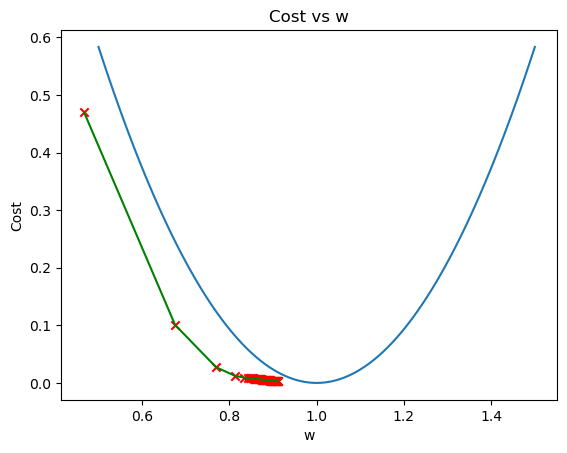

In [29]:
# Use the variable i to change the number of data to plot
# use len(w_history) to plot all

#n = len(w_history)
n = 50


w = np.linspace(0.5,1.5,600)
costw = cost_function_l(x,y,0,w)
plt.close('all') 
fig = plt.figure()
# Plot the data points
plt.plot(w,costw)
# Plot w by cost
plt.scatter(w_history[:n],cost_history[:n], marker='x', color='red')
plt.plot(w_history[:n],cost_history[:n], color='g')
# Set the title
plt.title("Cost vs w")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('w')
plt.show()

**Let us increase the learning rate to 0.5**

In [30]:
w, b, cost_history,  w_history, b_history = compute_gradient_descent_l(x,y, iterations = 300, alpha = 0.5, printProgress=True, printProgressRate=50)

iteration 0: db = -2.0000e+00: b = 1.0000e+00: dw = -4.6667e+00: w = 2.3333e+00: cost = 7.3148e+00
iteration 50: db = -5.6087e+12: b = 1.7931e+12: dw = -1.2750e+13: w = 4.0762e+12: cost = 5.4995e+25
iteration 100: db = -1.5388e+25: b = 4.9195e+24: dw = -3.4980e+25: w = 1.1183e+25: cost = 4.1396e+50
iteration 150: db = -4.2217e+37: b = 1.3497e+37: dw = -9.5970e+37: w = 3.0682e+37: cost = 3.1159e+75
iteration 200: db = -1.1583e+50: b = 3.7030e+49: dw = -2.6330e+50: w = 8.4178e+49: cost = 2.3454e+100
iteration 250: db = -3.1778e+62: b = 1.0159e+62: dw = -7.2238e+62: w = 2.3095e+62: cost = 1.7654e+125
best w -3.5732610342611705e+74
best b -1.5718836619082006e+74


**With higher learning rate we cannot converge**

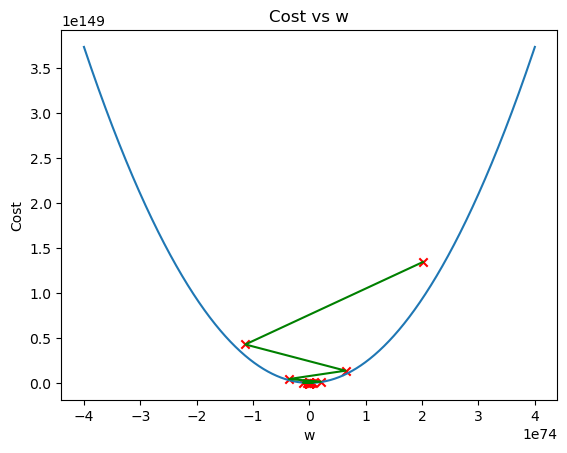

In [31]:
# Use the variable i to change the number of data to plot
# use len(w_history) to plot all

#n = len(w_history)
n = 299

w = np.linspace(-4e74,4e74,6000)
costw = cost_function_l(x,y,0,w)
plt.close('all') 
fig = plt.figure()
# Plot the data points
plt.plot(w,costw)
# Plot w by cost
plt.scatter(w_history[:n],cost_history[:n], marker='x', color='red')
plt.plot(w_history[:n],cost_history[:n], color='g')
# Set the title
plt.title("Cost vs w")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('w')
plt.show()

<div class="alert alert-block alert-warning">

<b> Please note that the lowest cost should be when w = 1. However the chart is so big that it looks similar to 0. Please note that the 1 on the x axis is 1e74 instead of 1. Please examine the scale closely.</b>

<b> Please also note that in this case the value of w and cost move from very low value to very high value. With high alpha, we will never converge.</b>

<b> Please use n in the previous cell to show the plot from 297 to 300.</b>
</div>

<div class="alert alert-block alert-info">

<b> Higher learning rate will cause `w` to move wildly from negative to positive. The value of cost will not descent but increase to a very large number. Not only that, the scale of the cost and learning parameters also increase significantly. Never set your learning rate ($\alpha$) too high. </b>

</div>

Let us examine how learning rate caused the parameters to swing wildly.

In [32]:
w, b, cost_history,  w_history, b_history = compute_gradient_descent_l(x,y, iterations = 30, alpha = 0.5, printProgress=True, printProgressRate=1)

iteration 0: db = -2.0000e+00: b = 1.0000e+00: dw = -4.6667e+00: w = 2.3333e+00: cost = 7.3148e+00
iteration 1: db = 3.6667e+00: b = -8.3333e-01: dw = 8.2222e+00: w = -1.7778e+00: cost = 2.2981e+01
iteration 2: db = -6.3889e+00: b = 2.3611e+00: dw = -1.4630e+01: w = 5.5370e+00: cost = 7.2243e+01
iteration 3: db = 1.1435e+01: b = -3.3565e+00: dw = 2.5895e+01: w = -7.4105e+00: cost = 2.2714e+02
iteration 4: db = -2.0177e+01: b = 6.7323e+00: dw = -4.5962e+01: w = 1.5570e+01: cost = 7.1421e+02
iteration 5: db = 3.5873e+01: b = -1.1204e+01: dw = 8.1460e+01: w = -2.5160e+01: cost = 2.2457e+03
iteration 6: db = -6.3523e+01: b = 2.0557e+01: dw = -1.4449e+02: w = 4.7084e+01: cost = 7.0614e+03
iteration 7: db = 1.1272e+02: b = -3.5805e+01: dw = 2.5617e+02: w = -8.1002e+01: cost = 2.2203e+04
iteration 8: db = -1.9981e+02: b = 6.4100e+01: dw = -4.5429e+02: w = 1.4614e+02: cost = 6.9816e+04
iteration 9: db = 3.5438e+02: b = -1.1309e+02: dw = 8.0553e+02: w = -2.5662e+02: cost = 2.1953e+05
iteration 

**From the chart and cost history demonstrated above, we can conclude that higher learning rate will caused the cost of error to increase rapidly.**

## Computation of Gradient Descent (Using Tolerance limits)

The following code is the same as above but we modified it to use tolerence:

In [33]:
def compute_gradient_descent_lt(x, y, tolerance=0.00000001, init_b=0., init_w=0., alpha=0.01, printProgress=False, printProgressRate=1000):


    # Initialization of variables
    db = 0
    dw = 0

    b = init_b
    w = init_w
    
    cost_history = []
    w_history = []
    b_history = []

    old_w = w
    old_b = b

    count = 1
    
    while True:

        # Compute Partial Derivatives
        db, dw = compute_gradient_l(x,y,b,w) 

        b = b - (alpha * db)
        w = w - (alpha * dw)
        
        cost = cost_function_l(x,y,b,w)
        
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)

        if printProgress == True:
            if count % printProgressRate == 0:
                print(f"iteration {count}: db = {db:.4e}: b = {b:.4e}: dw = {dw:.4e}: w = {w:.4e}: cost = {cost:.4e}")

        if w - old_w < tolerance and  b - old_b < tolerance:
            break
        else:
            old_w = w
            old_b = b
            count += 1
        
    print('best w', round(w, 4))
    print('best b', round(b, 4)) 
    print('Total iterations', count)

    return w, b, cost_history, w_history, b_history

### Testing Gradient Descent : Test Case 1

In [34]:
x = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)

In [35]:
w, b, cost_history, w_history, b_history = compute_gradient_descent_lt(x,y, printProgress=True)

iteration 1000: db = 1.3324e-02: b = 1.1072e-01: dw = -5.8611e-03: w = 9.5130e-01: cost = 8.7923e-04
iteration 2000: db = 4.0022e-03: b = 3.3257e-02: dw = -1.7606e-03: w = 9.8537e-01: cost = 7.9334e-05
iteration 3000: db = 1.2022e-03: b = 9.9900e-03: dw = -5.2885e-04: w = 9.9561e-01: cost = 7.1585e-06
iteration 4000: db = 3.6113e-04: b = 3.0008e-03: dw = -1.5886e-04: w = 9.9868e-01: cost = 6.4592e-07
iteration 5000: db = 1.0848e-04: b = 9.0141e-04: dw = -4.7719e-05: w = 9.9960e-01: cost = 5.8282e-08
iteration 6000: db = 3.2585e-05: b = 2.7077e-04: dw = -1.4334e-05: w = 9.9988e-01: cost = 5.2589e-09
iteration 7000: db = 9.7880e-06: b = 8.1336e-05: dw = -4.3058e-06: w = 9.9996e-01: cost = 4.7452e-10
iteration 8000: db = 2.9402e-06: b = 2.4432e-05: dw = -1.2934e-06: w = 9.9999e-01: cost = 4.2816e-11
best w 1.0
best b 0.0
Total iterations 8214


<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 1$ and $b = 0$ </li>
    </ul>
    </p>

### Testing Gradient Descent : Test Case 2

In [36]:
x2 = np.array([1.0, 2.0])   #features
y2 = np.array([300.0, 500.0])   #target value
best_w, best_b, cost_history, w_history, b_history = compute_gradient_descent_lt(x2,y2, printProgress=True)

iteration 1000: db = 6.0110e-01: b = 1.0823e+02: dw = -3.7150e-01: w = 1.9491e+02: cost = 3.4175e+00
iteration 2000: db = 2.8975e-01: b = 1.0397e+02: dw = -1.7907e-01: w = 1.9755e+02: cost = 7.9405e-01
iteration 3000: db = 1.3967e-01: b = 1.0191e+02: dw = -8.6318e-02: w = 1.9882e+02: cost = 1.8450e-01
iteration 4000: db = 6.7322e-02: b = 1.0092e+02: dw = -4.1608e-02: w = 1.9943e+02: cost = 4.2868e-02
iteration 5000: db = 3.2451e-02: b = 1.0044e+02: dw = -2.0056e-02: w = 1.9973e+02: cost = 9.9603e-03
iteration 6000: db = 1.5642e-02: b = 1.0021e+02: dw = -9.6675e-03: w = 1.9987e+02: cost = 2.3143e-03
iteration 7000: db = 7.5400e-03: b = 1.0010e+02: dw = -4.6600e-03: w = 1.9994e+02: cost = 5.3772e-04
iteration 8000: db = 3.6345e-03: b = 1.0005e+02: dw = -2.2462e-03: w = 1.9997e+02: cost = 1.2494e-04
iteration 9000: db = 1.7519e-03: b = 1.0002e+02: dw = -1.0827e-03: w = 1.9999e+02: cost = 2.9030e-05
iteration 10000: db = 8.4447e-04: b = 1.0001e+02: dw = -5.2191e-04: w = 1.9999e+02: cost = 

<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 200$ and $b = 100$ </li>
    </ul>
    </p>

### Testing Gradient Descent : Test Case 3

In [37]:
x3 = np.array([1,2,3])
y3 = np.array([3,4,5])
best_w, best_b, cost_history, w_history, b_history = compute_gradient_descent_lt(x3,y3)

best w 1.0
best b 2.0
Total iterations 9950


<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 1$ and $b = 2$ </li>
    </ul>
    </p>

## Comparing Tolerance vs Iterations

In [38]:
x = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)

In [39]:
%%timeit -r 1 -n 1
compute_gradient_descent_l(x,y,iterations = 10000)

best w 1.0
best b 0.0
65 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [40]:
%%timeit -r 1 -n 1
compute_gradient_descent_lt(x,y, tolerance= 0.00000001)

best w 1.0
best b 0.0
Total iterations 8214
55 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Tolerance runs faster as it did only 8214 loops instead of 10,000 loops. If we increase to a higher tolerance value, we should be able to run faster.

In [41]:
%%timeit -r 1 -n 1
compute_gradient_descent_lt(x,y, tolerance= 0.000001)

best w 0.9992
best b 0.0019
Total iterations 4385
35.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


However, at the expanse of accuracy. Next example:

### Next Example

In [42]:
x = np.array([1.0, 2.0])   #features
y = np.array([300.0, 500.0])   #target value

In [43]:
%%timeit -r 1 -n 1
compute_gradient_descent_l(x,y,iterations=10000)

best w 199.9929
best b 100.0116
50.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [44]:
%%timeit -r 1 -n 1
compute_gradient_descent_lt(x,y,tolerance= 0.00000001)

best w 200.0
best b 100.0
Total iterations 18575
203 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


It need more loops to reach optimal. Lets increase iterations to 18,000 loops.

In [45]:
%%timeit -r 1 -n 1
compute_gradient_descent_l(x,y,iterations=18000)

best w 200.0
best b 100.0
82.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


We can gain speed by keeping the iterations low.

<div class="alert alert-block alert-info"><b> Please note that we do not need to be so focus on the accuracy. In practice, we do not have such a beautiful number to confirm our algorithm. For computation speed, we may need to adjust accordingly when we encounter big data.</b></div>

## Apply Housing Data Prediction Using Gradient Descent

Now, lets apply the gradient descent algorithm to the housing price example

### Prepare Data

In [46]:
df = pd.read_csv('./data/housing_one_var.csv')
df.head()

,sqft,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [47]:
x_train = df['sqft']
x_train.head()

0    2104
1    1600
2    2400
3    1416
4    3000
Name: sqft, dtype: int64

In [48]:
y_train = df['price']
y_train.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [49]:
m = len(x_train)
m

47

### Compute Gradient Descent on Housing Price Prediction

In [50]:
w, b, cost_history, w_history, b_history = compute_gradient_descent_l(x_train,y_train, printProgress=True)

iteration 0: db = -3.4041e+05: b = 3.4041e+03: dw = -7.6421e+08: w = 7.6421e+06: cost = 1.3493e+20


/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_13601/2662319823.py:6: RuntimeWarning: overflow encountered in double_scalars
  costEachEx = (fx - y[i]) ** 2
/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_13601/4183950779.py:18: RuntimeWarning: overflow encountered in double_scalars
  dw += temp_dw
/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_13601/2021540430.py:21: RuntimeWarning: invalid value encountered in double_scalars
  w = w - (alpha * dw)


iteration 1000: db = nan: b = nan: dw = nan: w = nan: cost = nan
iteration 2000: db = nan: b = nan: dw = nan: w = nan: cost = nan
iteration 3000: db = nan: b = nan: dw = nan: w = nan: cost = nan
iteration 4000: db = nan: b = nan: dw = nan: w = nan: cost = nan
iteration 5000: db = nan: b = nan: dw = nan: w = nan: cost = nan
iteration 6000: db = nan: b = nan: dw = nan: w = nan: cost = nan
iteration 7000: db = nan: b = nan: dw = nan: w = nan: cost = nan
iteration 8000: db = nan: b = nan: dw = nan: w = nan: cost = nan
iteration 9000: db = nan: b = nan: dw = nan: w = nan: cost = nan
best w nan
best b nan


<div class="alert alert-block alert-warning"> The above generate error because the number is too large. We need to convert x_train to a smaller number. </div>

In [51]:
# Thus we convert sqft to thousand sqft
x_norm = x_train / 1000

In [52]:
w, b, cost_history, w_history, b_history = compute_gradient_descent_l(x_norm,y_train, printProgress=True)

iteration 0: db = -3.4041e+05: b = 3.4041e+03: dw = -7.6421e+05: w = 7.6421e+03: cost = 5.8785e+10
iteration 1000: db = -3.5312e+02: b = 6.8127e+04: dw = 1.5669e+02: w = 1.3592e+05: cost = 2.0588e+09
iteration 2000: db = -1.1490e+02: b = 7.0248e+04: dw = 5.0988e+01: w = 1.3498e+05: cost = 2.0582e+09
iteration 3000: db = -3.7389e+01: b = 7.0938e+04: dw = 1.6591e+01: w = 1.3467e+05: cost = 2.0581e+09
iteration 4000: db = -1.2166e+01: b = 7.1162e+04: dw = 5.3987e+00: w = 1.3457e+05: cost = 2.0581e+09
iteration 5000: db = -3.9588e+00: b = 7.1235e+04: dw = 1.7567e+00: w = 1.3454e+05: cost = 2.0581e+09
iteration 6000: db = -1.2882e+00: b = 7.1259e+04: dw = 5.7162e-01: w = 1.3453e+05: cost = 2.0581e+09
iteration 7000: db = -4.1917e-01: b = 7.1267e+04: dw = 1.8600e-01: w = 1.3453e+05: cost = 2.0581e+09
iteration 8000: db = -1.3640e-01: b = 7.1269e+04: dw = 6.0525e-02: w = 1.3453e+05: cost = 2.0581e+09
iteration 9000: db = -4.4382e-02: b = 7.1270e+04: dw = 1.9694e-02: w = 1.3453e+05: cost = 2.0

### Plot Cost vs Iterations

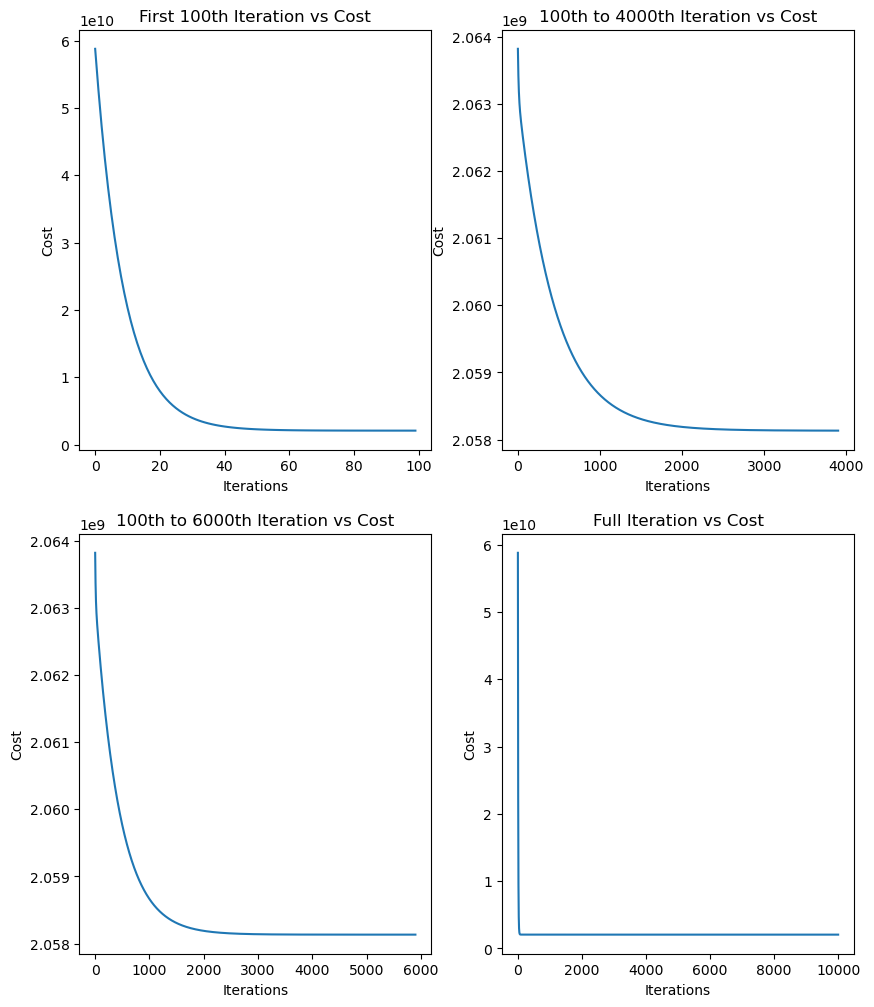

In [53]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax1.plot(cost_history[:100])
ax1.set_title('First 100th Iteration vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax2.plot(cost_history[100:4000])
ax2.set_title('100th to 4000th Iteration vs Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
ax3.plot(cost_history[100:6000])
ax3.set_title('100th to 6000th Iteration vs Cost')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost')
ax4.plot(cost_history)
ax4.set_title('Full Iteration vs Cost')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Cost')
plt.show()

<div class="alert alert-block alert-success"> <b>For housing price, why the cost never reach 0?</b> This is because the nature of the housing price plot is never like a straight line. It will be 0 if this is a straight line. We can lower the cost if we deploy a polynomial function instead of linear function. But ultimately we are not aiming for 0 cost. It will be explained in the later topics.</div>

### Comparing iteration and tolerance based gradient descent

In [54]:
%%timeit -r 1 -n 1
compute_gradient_descent_l(x_norm,y_train)

best w 134525.3448
best b 71270.3637
5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [55]:
%%timeit -r 1 -n 1
compute_gradient_descent_lt(x_norm,y_train)

best w 134525.2877
best b 71270.4924
Total iterations 18532
9.36 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**The gradient descent program that uses tolerance runs slightly longer**

### Plotting Housing Price with Prediction

In [56]:
def compute_prediction_line(x,b,w):
    m = len(x)
    f = np.zeros(m)
    for i in range(m):
        f[i] = (x[i] * w) + b
        
    return f

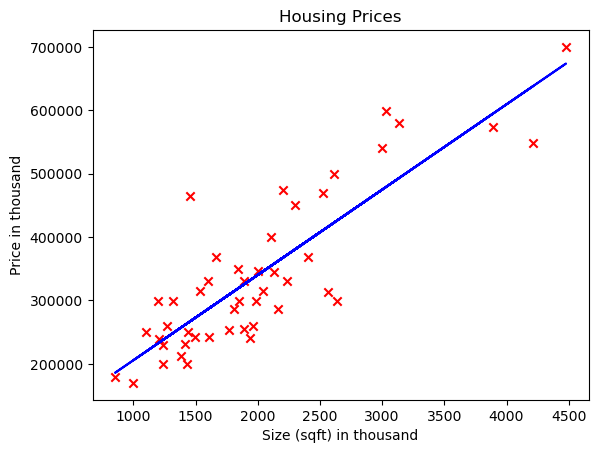

In [57]:
plt.close('all') 
py = compute_prediction_line(x_norm,b,w)
fig = plt.figure()
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
plt.plot(x_train,py,c='b')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price in thousand')
# Set the x-axis label
plt.xlabel('Size (sqft) in thousand')
plt.show()

In [58]:
def prediction_house_price(x,b,w):
    y_predict = (x * w) + b
    return y_predict

In [59]:
estimated_price = prediction_house_price(3000/1000,b,w)
print(f"Estimated selling price of a house with {3000:,}sqft is ${estimated_price:,.2f}.")

Estimated selling price of a house with 3,000sqft is $474,846.40.


**Note:**
**When we normalized x_train, we must also normalized our x prediction. Thus we need to divide the square foot by 1000 when we enter our prediction square foot.** 

## Final Words on Gradient Descent

<div class="alert alert-block alert-info">

**In practice, we do not use gradient descent to predict a linear regression. Most machine learning tools uses normal equation to get the best fit line. However, gradient descent is a powerful tool that has applications beyond linear regression or polynomial regression. This algorithm can be applied to other machine learning methods such as logistics regression and neural network which we will learn later. Normal equation would not work on logistics regression. In addition, if we have more features, the computation on normal equation will get complex and very slow.**

**Our purpose of using gradient descent in linear regression is to introduce the algorithm in a less complex situation. This helps us to understand the characteristics of this algorithm**
</div>

## End of Note 7